In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import random
import seaborn as sns
import math
from sklearn.impute import KNNImputer
import sklearn as sk
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_auc_score

import optuna

In [2]:
%run clustering.ipynb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169605 entries, 0 to 169604
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 169605 non-null  int64  
 1   loc                169605 non-null  float64
 2   v(g)               169605 non-null  float64
 3   ev(g)              169605 non-null  float64
 4   iv(g)              169605 non-null  float64
 5   n                  169605 non-null  float64
 6   v                  169605 non-null  float64
 7   l                  169605 non-null  float64
 8   d                  169605 non-null  float64
 9   i                  169605 non-null  float64
 10  e                  169605 non-null  float64
 11  b                  169605 non-null  float64
 12  t                  169605 non-null  float64
 13  lOCode             169605 non-null  int64  
 14  lOComment          169605 non-null  int64  
 15  lOBlank            169605 non-null  int64  
 16  lo

C:\Users\Fabrizio Ortega\.conda\envs\condaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [3]:
df_x = df[~df.defects.isna()].drop(columns='defects')
df_y = df[~df.defects.isna()].defects


x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.2,random_state=1,stratify=df_y,shuffle=True)

rskf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)
cv = rskf.split(x_train, y_train)

In [4]:
params = {'eta': 0.29795183295459826, 'n_estimators': 103, 'max_depth': 2, 'reg_lambda': 2.443650137484187, 'subsample': 0.7755241881125791, 'min_child_weight': 6, 'colsample_bytree': 0.790349885530548, 'random_state': 1}
model = XGBClassifier(**params)
cross_validate(model,x_train,y_train,cv=rskf.split(x_train, y_train),scoring='roc_auc',n_jobs=-1)

{'fit_time': array([2.50085688, 2.50998449, 2.51510596, 2.48455501, 2.49466372]),
 'score_time': array([0.01951957, 0.02015924, 0.02054071, 0.02054524, 0.01801348]),
 'test_score': array([0.79010052, 0.79344402, 0.79020946, 0.79409395, 0.78826735])}

In [4]:
def objective(trial):
    # model = LGBMClassifier(
    #     n_estimators = trial.suggest_int('n_estimators', 32, 256),
    #     learning_rate = trial.suggest_float('learning_rate', 0.001, 0.5),
    #     max_depth = trial.suggest_int('max_depth', 1, 10),
    #     num_leaves = trial.suggest_int('num_leaves', 2, 1024),
    #     reg_lambda  = trial.suggest_float('reg_lambda', 0.001, 10),
    #     reg_alpha = trial.suggest_float('reg_alpha', 0, 10),
    #     subsample = trial.suggest_float('subsample', 0.001, 1),
    #     colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1),
    #     min_child_samples = trial.suggest_int('min_child_samples', 2, 1024),
    #     min_child_weight = trial.suggest_int('min_child_weight', 1, 10),
    #     objective = trial.suggest_categorical('objective', ['multiclass']),
    #     metric = trial.suggest_categorical('metric', ['multi_logloss']),
    #     boosting_type = trial.suggest_categorical('boosting_type', ['gbdt']),
    #     random_state = trial.suggest_categorical('random_state', [1])
    # )
    
    # model = CatBoostClassifier(
    #     iterations = trial.suggest_int('iterations', 32, 128),
    #     learning_rate = trial.suggest_float('learning_rate', 0.001, 0.3),
    #     depth = trial.suggest_int('depth', 1, 10),
    #     l2_leaf_reg = trial.suggest_float('l2_leaf_reg', 0.01, 10),
    #     grow_policy = trial.suggest_categorical('grow_policy', ['Depthwise']),
    #     bootstrap_type = trial.suggest_categorical('bootstrap_type', ['Bayesian']),
    #     od_type = trial.suggest_categorical('od_type', ['Iter']),
    #     eval_metric = trial.suggest_categorical('eval_metric', ['TotalF1']),
    #     loss_function = trial.suggest_categorical('loss_function', ['MultiClass']),
    #     random_state = trial.suggest_categorical('random_state', [1]),
    #     verbose = trial.suggest_categorical('verbose', [0]) 
    # )
    
    # model = XGBClassifier(
    #     eta = trial.suggest_float('eta', 0.001, 0.3),
    #     n_estimators = trial.suggest_int('n_estimators', 32,128),
    #     max_depth = trial.suggest_int('max_depth', 1, 10),
    #     reg_lambda = trial.suggest_float('reg_lambda', 0.01, 10),
    #     subsample = trial.suggest_float('subsample', 0.01, 1),
    #     min_child_weight = trial.suggest_int('min_child_weight', 1, 10),
    #     colsample_bytree = trial.suggest_float('colsample_bytree', 0.01, 1),
    #     random_state = trial.suggest_categorical('random_state', [1])
    # )
    
    model =  MLPClassifier(
        hidden_layer_sizes = trial.suggest_categorical('hidden_layer_sizes',[[10,],[16,16],[16,32,64,16]]),
        alpha = trial.suggest_float('alpha', 1e-5, 10),
        batch_size = trial.suggest_int('batch_size',10,1000),
        learning_rate_init = trial.suggest_float('learning_rate_init', 1e-5, 1e-2),
        random_state = trial.suggest_categorical('random_state', [1]),
        beta_1 = trial.suggest_float('beta_1', 0.1, 0.95),
        beta_2 = trial.suggest_float('beta_2', 0.1, 0.95),
        epsilon = trial.suggest_float('epsilon', 1e-8, 1e-3),
    )
    
    scores = cross_validate(model,x_train,y_train,cv=rskf.split(x_train, y_train),scoring='roc_auc')
    return min(scores['test_score'])




In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200,n_jobs=-1)

study.best_params

[I 2023-10-04 12:32:01,545] A new study created in memory with name: no-name-3117161e-8947-4f37-809f-d0b2e2abab30
C:\Users\Fabrizio Ortega\.conda\envs\condaenv\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [10] which is of type list.
  warnings.warn(message)
C:\Users\Fabrizio Ortega\.conda\envs\condaenv\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [10] which is of type list.
  warnings.warn(message)
C:\Users\Fabrizio Ortega\.conda\envs\condaenv\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [16, 16] which is of type list.
  warnings.warn(message)
C:\Users\Fabrizio Ortega

In [1]:
import tensorflow as tf
tf.keras.backend.clear_session()

p = 0.4

model = tf.keras.models.Sequential([
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(32, activation='relu',kernel_initializer=tf.keras.initializers.HeNormal()),
  tf.keras.layers.Dropout(p),
  tf.keras.layers.Dense(128, activation='relu',kernel_initializer=tf.keras.initializers.HeNormal()),
  tf.keras.layers.Dropout(p),
  tf.keras.layers.Dense(128*2, activation='relu',kernel_initializer=tf.keras.initializers.HeNormal()),
  tf.keras.layers.Dropout(p),
  tf.keras.layers.Dense(128*2, activation='relu',kernel_initializer=tf.keras.initializers.HeNormal()),
  tf.keras.layers.Dropout(p),
  tf.keras.layers.Dense(32, activation='relu',kernel_initializer=tf.keras.initializers.HeNormal()),
  tf.keras.layers.Dropout(p),
  tf.keras.layers.Dense(1, activation='sigmoid',kernel_initializer=tf.keras.initializers.HeNormal())
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.AUC()])


model.fit(x_train, y_train, epochs=500, validation_split=0.2, workers=-1,batch_size=300)

NameError: name 'x_train' is not defined

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

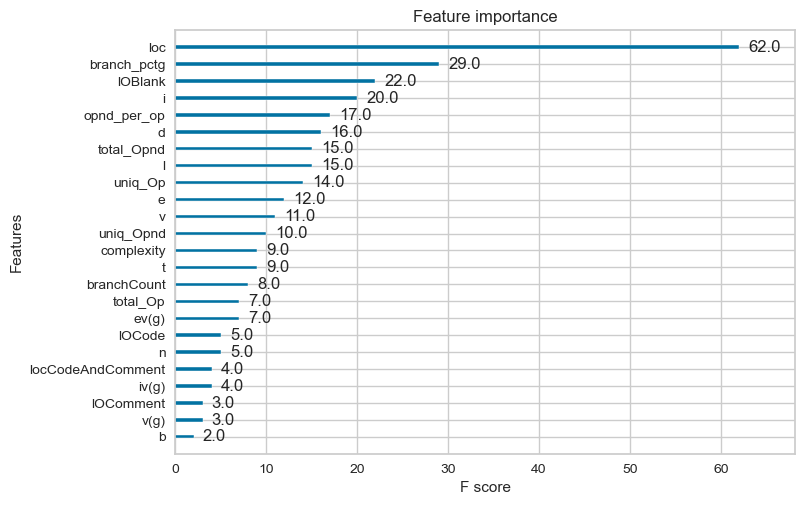

In [29]:
from xgboost import plot_importance
plot_importance(model)

In [26]:
model = model
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.790349885530548, early_stopping_rounds=None,
              enable_categorical=False, eta=0.29795183295459826,
              eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              n_estimators=103, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [27]:

roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])

0.7899264164502782

In [28]:
x_test_sub = df[df.defects.isna()].drop(columns='defects')
y_pred = model.predict_proba(x_test_sub)[:,1]
sub = pd.DataFrame.from_dict({'id':x_test_sub.index, 'defects':y_pred})
sub.to_csv("../resources/test_submission.csv",columns=["id","defects"],index=False)
sub

,id,defects
0,101763,0.228642
1,101764,0.201618
2,101765,0.676601
3,101766,0.463311
4,101767,0.127739
...,...,...
67837,169600,0.286261
67838,169601,0.109549
67839,169602,0.178473
67840,169603,0.095560
